# Part II - Airline Flight Data Analysis
## by Evans Addo-Sampong

## Investigation Overview


The focus of the exploratory analysis was on the airlines carriers.

Below are some few key insights that the anaylsis generated

Notable among the insights from the analysis is that, even though WN airlines had the highest number of recorded flights in 2008, they recorded the lowest number of cancelled flights but also the highest number of diverted flights. Wihtout making any concrete inferences, it could be argued that travelers may have prefereed WN to the other carriers because booked flights with WN were less likely to be cancelled. Further investigations into the correlation between number of cancelled flights and number of recorded flights could give better insights into the relationship between number of recorded flights by a carrier and the number of cancelled flights by that carrier.

## Dataset Overview

The dataset explored in this project is a flight data for 2008.
The dataset is has about 2.3 million rows and 29 columns. 
It comtains about 2.3 million instances of data on flights for the year 2008. The data include such flight features  
as the month of the flight, day of the month of the flight, day of the week of the flight, 
carrirer (airline), flight destination, flight origin and flight delay factors/reasons. 
The dataset was obtained from 
[Havard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7#)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

## Data Wrangling
The data was cleaned in 2 steps:
1. All duplicates were dropped from the dataset
2. The datatypes of the variables Month, DayOfMonth, and DayOfWeek were converted from int data types to object datatypes

## Distribution of Flights Among Carriers

The dataset contained data on 20 different airlines carriers. These carriers shared about 2.3 million flights among them. The distribution of flights among the carries is visualized in the cells below.

In [3]:
# set the base color for the plots
base_color = sns.color_palette()[0]

In [4]:
# create a plotting function
def plot(data, feature, order):
    sns.countplot(data = data, x =  feature, color = base_color, order = order);

<Figure size 720x432 with 0 Axes>

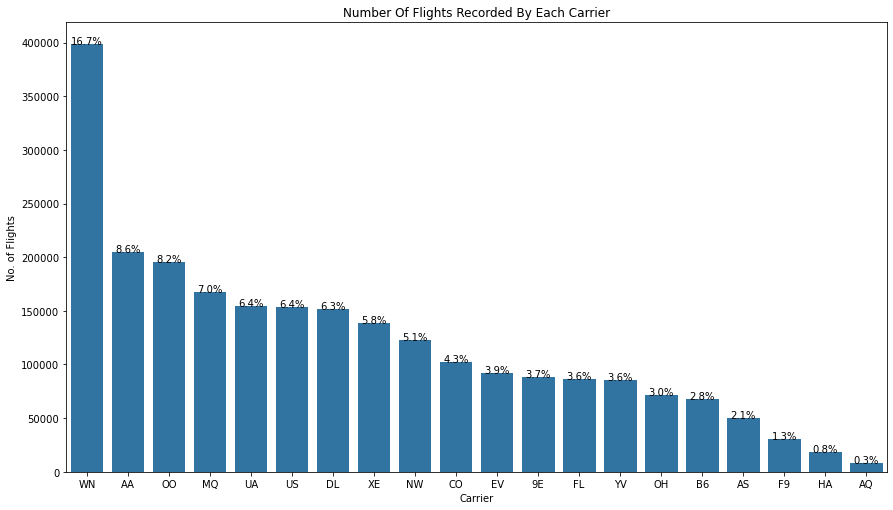

In [7]:
# plot flights recorded by carriers
plt.figure(figsize=[10,6])
carrier_counts= df_clean.UniqueCarrier.value_counts()
order_carrier = carrier_counts.index
sum_unique_carrier = df_clean.UniqueCarrier.value_counts().sum()
plt.figure(figsize=[14.70, 8.27])
plot(df_clean, df_clean.UniqueCarrier, order_carrier)
plt.title('Number Of Flights Recorded By Each Carrier')
plt.xlabel('Carrier')
plt.ylabel('No. of Flights')


# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = carrier_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sum_unique_carrier)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');

From the graph above, it can be observed that almost WN had the most flights recorded with a total of 16.7% of all flights recorded in 2008. This was followed by with a total of 8.6%. AQ had the least number of recorded flights with only 0.3% of the total flights recorded in 2008.

## Carries with the most Cancelled Flights


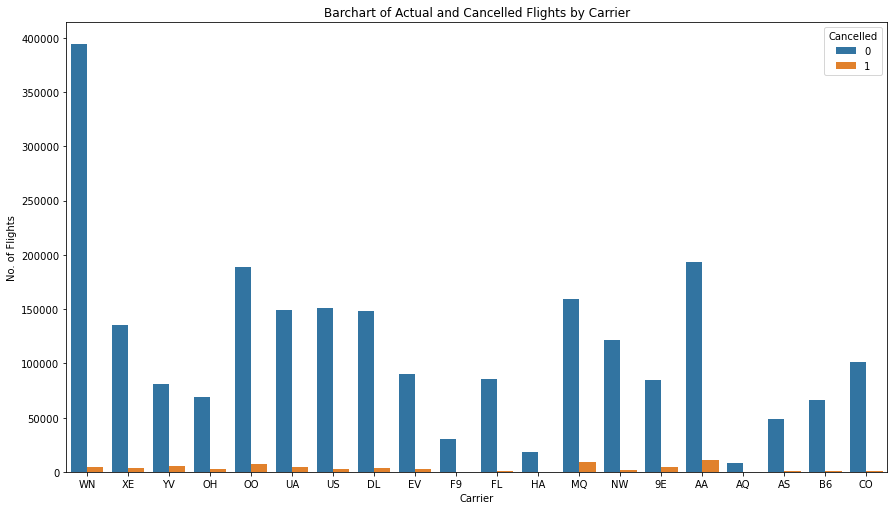

In [8]:
# plotting a clusterd barchart of actual and cancelled flights by carrier
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data=df_clean, x='UniqueCarrier', hue='Cancelled')
plt.title('Barchart of Actual and Cancelled Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('No. of Flights');

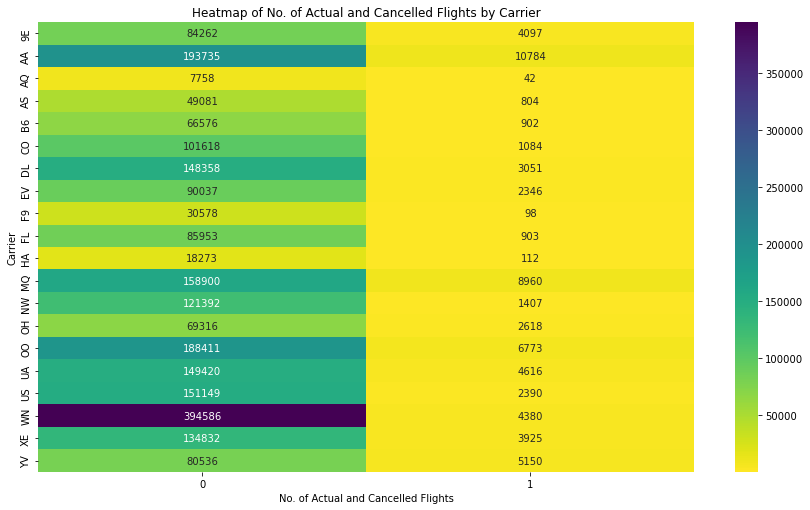

In [9]:
# grouping UniqueCarrier using the Cancelled flags
cancelled_counts = df_clean.groupby(['UniqueCarrier', 'Cancelled']).size()
cancelled_counts = cancelled_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data for plotting
cancelled_counts = cancelled_counts.pivot(index = 'UniqueCarrier', columns = 'Cancelled', values = 'count')
# plotting a heatmap of actual and cancelled flights by carrier
plt.figure(figsize=[14.70, 8.27])
sns.heatmap(cancelled_counts, annot = True, fmt = 'd', cmap='viridis_r')
plt.title('Heatmap of No. of Actual and Cancelled Flights by Carrier')
plt.xlabel('No. of Actual and Cancelled Flights')
plt.ylabel('Carrier');

It can be obsereved from the visualizations above that although WN had the most number of flights in 2008, they recorded very low flight cancellations. AA had by far the most number of flight cancellations, recording 10,784 cancelled flights, followed by MQ with 8,960 cancelled flights.

## Which Carries Had the Most Diverted Flights

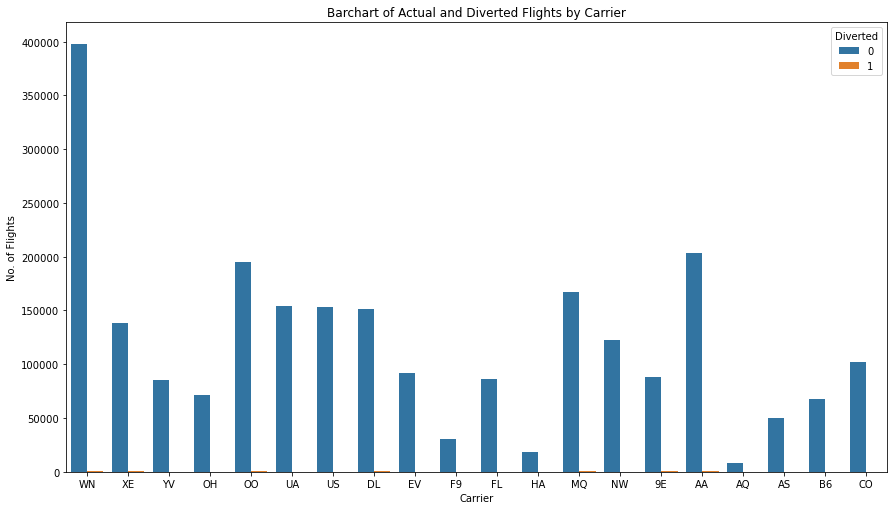

In [10]:
# barplot of diverted flights
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data=df_clean, x='UniqueCarrier', hue='Diverted')
plt.title('Barchart of Actual and Diverted Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('No. of Flights');

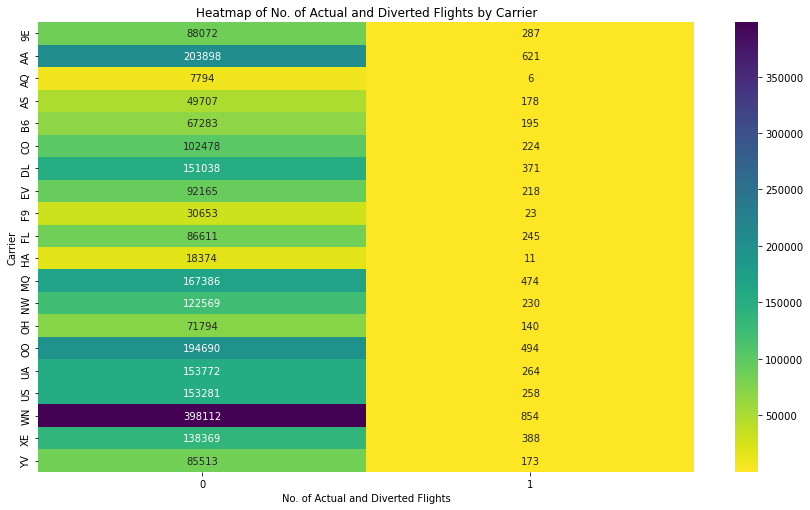

In [11]:
diverted_counts = df_clean.groupby(['UniqueCarrier', 'Diverted']).size()
diverted_counts = diverted_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data for plotting
diverted_counts = diverted_counts.pivot(index = 'UniqueCarrier', columns = 'Diverted', values = 'count')

# plotting a heatmap of actual and cancelled flights by carrier
plt.figure(figsize=[14.70, 8.27])
sns.heatmap(diverted_counts, annot = True, fmt = 'd', cmap='viridis_r')
plt.title('Heatmap of No. of Actual and Diverted Flights by Carrier')
plt.xlabel('No. of Actual and Diverted Flights')
plt.ylabel('Carrier');

Even though WN had the most recorded flights, they also recorded the most diverted flights with 854 diverted flights. AQ had the least number of diverted flights in 2008.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 776496 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
